##**Pandas Dataframes**
Pandas stands for "Panel Data", where "panel" basically means *table* or *spreadsheet*,  
that is, data arranged in rows and columns.  
- In Pandas, this spreadsheet-like data structure is called a **dataframe**.
- Unlike a spreadsheet, such as an Excel worksheet, a Pandas dataframe exists as a *variable*.  
- A dataframe is a two-dimensional **matrix** of rows and columns, having a **shape** property,  
 as a **tuple**. A 10-row x 4-column dataframe has a shape of (10, 4)
- A single row or column of a dataframe exists as a one-dimensional vector, called a **Series**.
- Numpy terms such as shape, dimensions, matrix, vector and tuple apply to dataframes, too,  
because Pandas is built on top of Numpy.  
- Like Numpy, Pandas is not core Python, so it must be imported.

In this lesson, we will learn how to:
- make a Pandas Series (1D data structure) from a list or Numpy array
- use **list()** and **tolist()** methods to convert a Numpy array or Panda Series to a list
- make a Pandas dataframe from multiple lists, one list per column
- make a Pandas dataframe from a dictionary, where each key value is a list
- select ranges of dataframe rows and/or columns by index number
- select ranges of dataframe rows and/or columns by column name
- use **loc** and **iloc** syntax to select data
- filter data based on a condition
- filter data based on multiple conditions
- add rows of data to an existing dataframe
- add columns to an existing dataframe
- run lambda functions on each value in a column

In [234]:
# import numpy and pandas as standard aliases:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Series:** a one-dimensional array / vector of data. It is similar to a Numpy vector,  
but since it relates to a dataframe, a Series also has row index values.
- **Series()** method takes a list or numpy array as its argument and returns a series.
- A row or column extracted from a dataframe exists as a series.


In [3]:
# using these numbers, make a numpy array called arr1:
arr1 = np.array([105,210,315,420,525,630,735,840,945])

# print arr1, along with its datatype, shape and dimensions:
print('arr1:', arr1, type(arr1), arr1.shape, arr1.ndim)
# arr1: [105 210 315 420 525 630 735 840 945] <class 'numpy.ndarray'> (9,) 1

arr1: [105 210 315 420 525 630 735 840 945] <class 'numpy.ndarray'> (9,) 1


In [4]:
# make a series from the array by passing it to Panda's Series() method:
series1 = pd.Series(arr1)
print('series1:\n', series1, type(arr1), arr1.shape, arr1.ndim)
# dtype: int64 <class 'pandas.core.series.Series'> (9,) 1
# L@@K: shape and dims are the same as for array, but it prints vertically due to row index:

series1:
 0    105
1    210
2    315
3    420
4    525
5    630
6    735
7    840
8    945
dtype: int64 <class 'numpy.ndarray'> (9,) 1


In [5]:
# make a series directly from a list (no numpy array required):
series1 = pd.Series([105,210,315,420,525,630,735,840,945])
print('series1:\n', series1)
# dtype: int64 <class 'pandas.core.series.Series'> (9,) 1

series1:
 0    105
1    210
2    315
3    420
4    525
5    630
6    735
7    840
8    945
dtype: int64


**list()** and **tolist()** methods convert a Numpy array or Panda Series to a list

In [6]:
# make lists from arr1 and from series1, using list() and tolist():
list1 = list(arr1)
print(list1)

list2 = arr1.tolist()
print(list2)

list3 = list(series1)
print(list3)

list4 = series1.tolist()
print(list4)

[105, 210, 315, 420, 525, 630, 735, 840, 945]
[105, 210, 315, 420, 525, 630, 735, 840, 945]
[105, 210, 315, 420, 525, 630, 735, 840, 945]
[105, 210, 315, 420, 525, 630, 735, 840, 945]


**Pandas DataFrame**: two-dimensional data structure, consising of rows and columns.

- Dataframes are often made from loaded data, such as from a **CSV** file,  
but they can be made from lists, arrays or dictionaries, which is how we will start.
- **DataFrame()** method returns a dataframe
- if provided no arguments, DataFrame() returns a new, empty dataframe
- DataFrame() can takes a 2D array or a dictionary as its argument,  
in which case it returns a dataframe with data already in it

In [7]:
# make a 3x3 array from list1:
_3x3 = np.array([105, 210, 315, 420, 525, 630, 735, 840, 945]).reshape(3,3)

print('_3x3:\n', _3x3)
print()

_3x3:
 [[105 210 315]
 [420 525 630]
 [735 840 945]]



In [8]:
# make a 3 row, 3 col dataframes from the 3x3 array:
_3x3_df = pd.DataFrame(_3x3)

In [9]:
# print the dataframe:
_3x3_df

# L@@K: the rows and cols of the numpy array have become labeled dataframe rows and cols
# because we did not assign column or row index names, they default to indexing from 0:

,0,1,2
0,105,210,315
1,420,525,630
2,735,840,945


In [10]:
# to output a dataframe propery, just run it--do NOT print it:
# _3x

In [11]:
# CHALLENGE:
# using the provided X's and O's, make a 3x3 tic-tac-toe dataframe, called ttt_df
# HINT:
# It's the same thing we just did with _3x3, except using 9 different values
# print(ttt)
ttt = np.array(['X','O','X','O','X','O','O','X','X']).reshape(3,3)
ttt_df = pd.DataFrame(ttt)
ttt_df

# L@@K: X wins diagonally from upper left

,0,1,2
0,X,O,X
1,O,X,O
2,O,X,X


**avoid raggy rows** Numpy throws an error if you try to make a 2D array from unequal length lists.  
Same goes for Pandas: it doesn't like "ragged rows"

In [12]:
# a numpy arr cannot be ragged (unequal number of values per row / different lengths or shapes)
# try to make a numpy array from a "ragged nested sequence":
# 'X','O','X', 'O','X','O', 'X','O'


In [13]:
# if you don't have a value to fill out a ragged list, use some null value, like an empty space
# if you don't have a value, use some placeholder to complete the row, such as an empty space
# 'X','O','X', 'O','X','O', 'X','O'
# tt
# df

**providing column and row names**.  
- **index (row) names:** dataframes can be assigned row names , but this will often just be the index number, starting from 0  
- **column names**: dataframes almost always have string column names--not just index numbers.
- row and column names can be passed to the DataFrame() method when the dataframe is made
- names are assigned to the **index** and **column** properties of the **DataFrame()** method

In [14]:
# redo the tic-tac-toe dataframe, but this time assigning row (index) and column names.
# pass the names in as a list, one item per row / col as values of the index and column
# paramaters, respectively
ttt_df = pd.DataFrame(ttt, columns=['Col1', 'Col2', 'Col3'],
                      index=['Row1', 'Row2', 'Row3'])
ttt_df

,Col1,Col2,Col3
Row1,X,O,X
Row2,O,X,O
Row3,O,X,X


**Starting with a new, empty DataFrame**.  

- You can make a new, empty dataframe, and then assign the data after the fact.
- The data can be assigned as lists, one per column.
- The list length results in that many rows in the dataframe.
- To avoid ragged rows problem, make sure all lists are of equal length

In [15]:
# declare a new empty DataFrame called food_df
food_df = pd.DataFrame()

In [16]:
# using the provided data, declare 5 lists of 4 items each
items = ["Steak","Pizza","Hamburger","Salad"]
prices = [49.99, 19.99, 5.75, 2.99]
cals = [500, 300, 600, 200]
vegan = [False, False, False, True]
healthy = [True, False, False, True]

In [17]:
# Assign columns to the df, setting them equal to the lists
# the syntax is just like assigning keys to a dictionary
# the list provides the values for their column
# since each list has 4 items, the dataframe is assigned 4 rows
food_df['Item'] = items
food_df['Price'] = prices
food_df['Cal'] = cals
food_df['Vegan'] = vegan
food_df['Healthy'] = healthy

In [18]:
# output the dataframe along with its shape:
print(food_df.shape) # (4, 5)
food_df

(4, 5)


,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True


###**df.iloc[num]**  
gets a dataframe row as **series**.  
The single square brackets indicate a 1D selection
**iloc** stands for *integer location*

In [19]:
# .iloc - integer location for selecting slices

# select the Pizza row, which is at index 1
# a single row or column from a dataframe is a Series:
pizza_series = food_df.iloc[1]
print(pizza_series)
# Food       Pizza
# Price      19.99
# Cal          300
# Vegan      False
# Healthy    False
# Name: 1, dtype: object <class 'pandas.core.series.Series'> (5,) 1
# L@@K: the index of the series is the column names


Item       Pizza
Price      19.99
Cal          300
Vegan      False
Healthy    False
Name: 1, dtype: object


In [20]:
# pass the series to a list to get the Pizza row as a list of 5 items of mixed datatype:
pizza_list = pizza_series.tolist()
print(pizza_list)

# ['Pizza', 19.99, 300, False, False]
# L@@K: a list from a dataframe row is often a "mixed bag" of various datatypes

['Pizza', 19.99, 300, False, False]


###**df.iloc[row,col]**
To get an individual piece of data, look it up by row and column as you would in a Numpy array

In [21]:
# Get the word "Pizza" at row index 1. The "Food" column is at index 0
food_item = food_df.iloc[1,0]
print(food_item)

Pizza


###**df.iloc[[num]]**  
- To get a dataframe slice as a 2D dataframe--not just as a 1D series--use iloc with double square brackets.  
- The **[ [ num ] ]** indicate a 2D selection

In [22]:
# get the Pizza row as df
pizza_df = food_df.iloc[[1]]
pizza_df

,Item,Price,Cal,Vegan,Healthy
1,Pizza,19.99,300,False,False


###**df.iloc[start_index:end_index]**
**slicing dataframe ranges**
- To get a range of rows, look them up by row start and row end index, with a colon separator,  
as you would in a Numpy array.
- for a consec range use **colon** (not **comma**) inside only one set square brackets: **[ ]**
- The end index is exclusive, that is, not included in the result


In [23]:
# iloc select range of rows AND cols
# for a consec range use : not , and only one set of []
# get the first 3 rows of the food_df:
food_df.iloc[0:3]

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False


In [24]:
# if starting from the beginning, the 0 can be omitted:
food_df.iloc[:3]

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False


In [25]:
# get the last 2 rows of the food_df
# to go to the end, nothing goes after the colon:
food_df.iloc[-2:]

,Item,Price,Cal,Vegan,Healthy
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True


**selecting non-contiguous rows**  
**df.iloc[[row,row]]**
- non-contiguous rows are not consecutive
- use comma (not colon) inside double square brackets: **[ [ ] ]**

In [26]:
# Get the non-contiguous Pizza and Salad rows as df
# Salad is the last row, which can be referred to as -1
food_df.iloc[[1,-1]]

,Item,Price,Cal,Vegan,Healthy
1,Pizza,19.99,300,False,False
3,Salad,2.99,200,True,True


**selecting ranges of rows AND columns**.  
**df.iloc[ row_start_index : row_end_index, col_start_index : col_end_index ]**


To select by rows *and* columns, specify start:end index ranges for both
- the first range is the **rows**
- the second range is the **columns**
- each **start:end** range is separated by a **colon**
- the two ranges are separated from each other by a **comma**
- the ranges go inside one set of square brackets


In [27]:
# get 1st 3 rows x 1st 3 cols , and only one set []
food_df.iloc[:3,:3]

,Item,Price,Cal
0,Steak,49.99,500
1,Pizza,19.99,300
2,Hamburger,5.75,600


In [28]:
# CHALLENGE: get the last 3 rows x last 3 cols of the food_df
# -3: for both ranges starts 3rd from end and goes to the end
food_df.iloc[-3:,-3:]

,Cal,Vegan,Healthy
1,300,False,False
2,600,False,False
3,200,True,True


**selecting non-contiguous columns**  
**df.iloc[row,[col_list]]**
- non-contiguous columns are not consecutive
- pass a list of the column indexes

In [29]:
# get the last 3 rows, just the non-contiguous Food and Vegan columns
# specify the col nums as list: [0,3]
food_df.iloc[-3:,[0,3]]

,Item,Vegan
1,Pizza,False
2,Hamburger,False
3,Salad,True


**selecting non-contiguous rows and non-contiguous columns**  
**df.iloc[[row_list],[col_list]]**
- pass in lists of row and column indexes

In [30]:
# get the first and last rows, first and next-to-last columns only
# Steak and Salad, w Vegan as only other col besides Item
food_df.iloc[[0,-1],[0,-2]]

,Item,Vegan
0,Steak,False
3,Salad,True


**selecting non-contiguous columns by name as list**
- selecting columns by name rather than number is more user-friendly

In [31]:
# get just 'Item', 'Cal', 'Healthy' cols by name:
food_df[['Item', 'Cal', 'Healthy']]

,Item,Cal,Healthy
0,Steak,500,True
1,Pizza,300,False
2,Hamburger,600,False
3,Salad,200,True


In [32]:
# get the same as above, but just for the last 2 rows
# to do this, tack on row range after the column list selection
food_df[['Item', 'Cal', 'Healthy']].iloc[-2:]

,Item,Cal,Healthy
2,Hamburger,600,False
3,Salad,200,True


In [33]:
# iloc optional
food_df[['Item', 'Cal', 'Healthy']][-2:]

,Item,Cal,Healthy
2,Hamburger,600,False
3,Salad,200,True


In [34]:
# iloc optional if all cols:
food_df[-2:]

,Item,Price,Cal,Vegan,Healthy
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True


In [35]:
# iloc NOT optional if range of both rows and cols:
food_df.iloc[-2:,-2:]

,Vegan,Healthy
2,False,False
3,True,True


### **loc[ ]** for selecting by names, rather than index numbers
- **loc** stands for *location*
- if the row names are the same as row index, use index number for rows

In [36]:
# loc[] for location is for selecting by name as well as number
# get last 3 rows and only "Item", "Price", "Healthy" cols
# to get all rows, put colon-comma before the columns list:
food_df.loc[1:,["Item", "Price", "Healthy"]]

,Item,Price,Healthy
1,Pizza,19.99,False
2,Hamburger,5.75,False
3,Salad,2.99,True


In [37]:
# compare the above to .iloc, which works but is less user-friendly
# as it requires you to know the index numbers of the columns:
food_df.iloc[1:,[0, 2, 4]]

,Item,Cal,Healthy
1,Pizza,300,False
2,Hamburger,600,False
3,Salad,200,True


In [38]:
# CHALLENGE: using loc (not iloc) get "Item", "Vegan", "Healthy" columns,
# but just the last two rows:
food_df.loc[2:, ["Item", "Vegan", "Healthy"]]

,Item,Vegan,Healthy
2,Hamburger,False,False
3,Salad,True,True


### **Selecting DataFrame rows by column value condition**
**df[ column condition ]**
- to select only rows where a specific column values meets a condition,  
put the column and condition inside square brackets
- the condition is expressed as a **boolean comparison (==, <, >, <=, >=, !=)**
- every row where the column boolean comparison is **True** is included in the result

In [39]:
# get all rows where the price is less than 10
# pass a condition as boolean comparison into the df, inside []
# df[condition]
# every row's Price value will be subjected to this boolean comparison
# only True results will get saved to the new df that is returned:
# "Price"
price_less_10_df = food_df[ food_df['Price'] < 10 ]
price_less_10_df

,Item,Price,Cal,Vegan,Healthy
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True


In [40]:
# CHALLENGE:
# Save to a new dataframe called cals_min_500_df those items of 500 calories or less
cals_min_500_df = food_df[ food_df['Cal'] <= 500 ]
cals_min_500_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
3,Salad,2.99,200,True,True


**adding a new row to a dataframe**
- **df.loc[num]** for location indicates a row number
- specify the new next row number and set it equal to a list of values, one per column

In [41]:
# loc[num] for location indicates a row number, num
# add a row at the end of the food_df at index 4
# the row is set equal to a list of 5 values, one per column
fru_salad = ["Fruit Salad", 8.95, 380, True, True]
food_df.loc[4] = fru_salad

In [42]:
food_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True
4,Fruit Salad,8.95,380,True,True


**len(df.index)** returns the number of rows in a dataframe.  
- **len(df.index)** is more dynamic than hard-coding the row number
- row indexing starts at 0, so the length of the df equals the next row indes


In [43]:
# len(df.index) returns the number of rows
# row indexing starts at 0, so the length is the index of the next new row
# add a new row for Bison Burger using the dynamic len(food_df).index syntax:
#  "Bison Burger", 16.95, 1000, False, True
len(food_df.index) # 5
food_df.loc[len(food_df.index)] = ["Bison Burger", 16.95, 1000, False, True]

In [44]:
food_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True
4,Fruit Salad,8.95,380,True,True
5,Bison Burger,16.95,1000,False,True


**using a loop to add multiple rows to a df**
- row data exists as list of lists
- each list is one row: Food, Price, Cal, etc.
- iterate the list with a for loop
- each time through the loop, set the next row index equal to the current list of
- be careful not to rerun the cell, as you will get the 3 new food items added all over again

In [45]:
# add "Chicken Salad", "Cesar Salad" and "Cheeseburger" rows to the food df:
new_items = [
    ["Chicken Salad", 12.95, 700, False, True],
    ["Cesar Salad", 14.95, 600, False, True],
    ["Cheeseburger", 17.95, 1200, False, True]
]

for item in new_items:
  food_df.loc[len(food_df.index)] = item

In [46]:
food_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True
4,Fruit Salad,8.95,380,True,True
5,Bison Burger,16.95,1000,False,True
6,Chicken Salad,12.95,700,False,True
7,Cesar Salad,14.95,600,False,True
8,Cheeseburger,17.95,1200,False,True


In [47]:
# get just the Salad
# the boolean comparison checks if the "Item" == "Salad"
salads_df = food_df[ food_df['Item'] == 'Salad' ]

In [48]:
salads_df
# L@@K: all we got is the plain "Salad", but we want any food that includes "Salad"

,Item,Price,Cal,Vegan,Healthy
3,Salad,2.99,200,True,True


**partial match strings**.  
**df[column_name].str.contains(sub_string)**
- to get all Salads we need to get all foods that contain the word "Salad" --  
exact match only gets us the actual plain "Salad"

In [49]:
# string partial match select
# using str.contains(string), get all rows where
# "Item" column contains the word 'Salad'
salads_df = food_df[ food_df['Item'].str.contains('Salad') ]
salads_df

,Item,Price,Cal,Vegan,Healthy
3,Salad,2.99,200,True,True
4,Fruit Salad,8.95,380,True,True
6,Chicken Salad,12.95,700,False,True
7,Cesar Salad,14.95,600,False,True


In [50]:
# get just the hamburger row
hamburger_df = food_df[ food_df['Item'] == 'Hamburger' ]
hamburger_df

,Item,Price,Cal,Vegan,Healthy
2,Hamburger,5.75,600,False,False


In [51]:
# get all the foods that contain "burger":
burgers_df = food_df[ food_df['Item'].str.contains('burger')]
burgers_df

# L@@K: Bison Burger is missing, because its "Burger" is capitalized

,Item,Price,Cal,Vegan,Healthy
2,Hamburger,5.75,600,False,False
8,Cheeseburger,17.95,1200,False,True


In [52]:
# get all burgers, regardless of case, by adding case=False :
burgers_df = food_df[ food_df['Item'].str.contains('burger', case=False)]
burgers_df

,Item,Price,Cal,Vegan,Healthy
2,Hamburger,5.75,600,False,False
5,Bison Burger,16.95,1000,False,True
8,Cheeseburger,17.95,1200,False,True


**df.info()** returns info ablut each col, specifically number of rows with missing / invalid data and data type of column

In [53]:
# get info about the df:

food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Item     9 non-null      object 
 1   Price    9 non-null      float64
 2   Cal      9 non-null      int64  
 3   Vegan    9 non-null      bool   
 4   Healthy  9 non-null      bool   
dtypes: bool(2), float64(1), int64(1), object(1)
memory usage: 306.0+ bytes


**df.describe()** returns statistical data about the numeric cols
- data includes, min, max, mean, 75%, 50%, 25%

In [100]:
food_df.describe()

,Price,Cal
count,9.000000,9.000000
mean,16.718889,608.888889
std,13.719166,323.590963
min,2.990000,200.000000
25%,8.950000,380.000000
50%,14.950000,600.000000
75%,17.950000,700.000000
max,49.990000,1200.000000


**select / filter df by multiple conditions**.

**df[ (condition 1) & (condition 2) ]**

In [110]:
# get healthy foods with a minimum of 500 calories
# selecting by two conditions require (cond1) & (cond2)
healthy_min500cal_df = food_df[ (food_df['Cal'] >= 500) & (food_df['Healthy'] == True)]

In [111]:
healthy_min500cal_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
5,Bison Burger,16.95,1000,False,True
6,Chicken Salad,12.95,700,False,True
7,Cesar Salad,14.95,600,False,True
8,Cheeseburger,17.95,1200,False,True


In [ ]:
# for conditions where the value is itself a boolean, you can omit the == True part
# "Healthy" is itself a boolean, so rewrite the above but without == True
healthy_min500cal_df = food_df[ (food_df['Cal'] >= 500) & (food_df['Healthy'])]
healthy_min500cal_df

In [113]:
# CHALLENGE:
# triple filter: get healthy, min 500 calorie, items with a price of less than 15:
healthy_min500cal_max15price_df = food_df[ (food_df['Cal'] >= 500) & (food_df['Healthy']) & (food_df['Price'] < 15)]
healthy_min500cal_max15price_df

,Item,Price,Cal,Vegan,Healthy
6,Chicken Salad,12.95,700,False,True
7,Cesar Salad,14.95,600,False,True


**df.at(row, col_name)**
**set value of individual datapoint / cell**
- such as, increase/decrease ONE price
- stop claiming cheeseburger is healthy

In [114]:
# get cheeseburger Healthy value:
food_df.at[8, 'Healthy']

True

In [115]:
# set cheeseburger Healthy value to False
food_df.at[8, 'Healthy'] = False

In [116]:
# get cheeseburger Healthy value again to make sure change worked:
food_df.at[8, 'Healthy']

False

In [118]:
food_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True
4,Fruit Salad,8.95,380,True,True
5,Bison Burger,16.95,1000,False,True
6,Chicken Salad,12.95,700,False,True
7,Cesar Salad,14.95,600,False,True
8,Cheeseburger,17.95,1200,False,False


**Making a DataFrame from a dictionary**  
- pass the DataFrame() method a dictionary
- the **key** names are used as the column names

In [127]:
# make a dataframe from a dictionary
# declare a dictionary of sandwiches
# the dictionary consists as 5 properties as key-value pairs
# each key will be a column name in the
# set each key equal to a 3-item list
# this will result in 3 rows in the dataframe
sandwiches_dict = {
  "Item": ["Turkey Sandwich", "Tuna Salad Sandwich", "BLT"],
  "Price": [9.95, 8.95, 9.75],
  "Cal": [590, 620, 780],
  "Vegan": [False, False, False],
  "Healthy": [True, True, False]
}

In [ ]:
print(type(sandwiches_dict)) # <class 'dict'>
sandwiches_dict

In [130]:
# declare a dataframe, passing the dictionary to the DataFrame() method:
sandwiches_df = pd.DataFrame(sandwiches_dict)

In [131]:
print(sandwiches_df.shape, sandwiches_df.ndim) # (3,5) 2
sandwiches_df

(3, 5) 2


,Item,Price,Cal,Vegan,Healthy
0,Turkey Sandwich,9.95,590,False,True
1,Tuna Salad Sandwich,8.95,620,False,True
2,BLT,9.75,780,False,False


**pd.concat([main_df, df_to_add])**.

**Concatenating two dataframes together**
- add the new **sandwiches_df** dataframe to the original **food_df**
- the result will be three new rows in the **food_df**
- this will mess up the index numbering, which will start over from 0 with the sandwiches

In [140]:
# concatenate the new sandwiches_df onto the original food_df
food_df = pd.concat( [food_df, sandwiches_df] )

In [141]:
food_df

# L@@K: the row indexing has been messed up, with 8 followed by 0

,index,Item,Price,Cal,Vegan,Healthy
0,0.0,Steak,49.99,500,False,True
1,1.0,Pizza,19.99,300,False,False
2,2.0,Hamburger,5.75,600,False,False
3,3.0,Salad,2.99,200,True,True
4,4.0,Fruit Salad,8.95,380,True,True
5,5.0,Bison Burger,16.95,1000,False,True
6,6.0,Chicken Salad,12.95,700,False,True
7,7.0,Cesar Salad,14.95,600,False,True
8,8.0,Cheeseburger,17.95,1200,False,False
9,0.0,Turkey Sandwich,9.95,590,False,True


**reset_index() method for resetting row index numbers**.
- concatenating two dataframes into one messes up the consecutive row indexing
- reset the indexing with **reset_index()** method
- **drop=True** prevents the old wonky indexing from being saved to a new column

In [138]:
# concat messed up the indexing (it starts over from 0), so reset:
# specify drop=True to prevent the bad indexing from becoming a new column
food_df = food_df.reset_index()

In [139]:
food_df

# L@@K: the row indexing has been fixed, now going from 0-11

,index,Item,Price,Cal,Vegan,Healthy
0,0,Steak,49.99,500,False,True
1,1,Pizza,19.99,300,False,False
2,2,Hamburger,5.75,600,False,False
3,3,Salad,2.99,200,True,True
4,4,Fruit Salad,8.95,380,True,True
5,5,Bison Burger,16.95,1000,False,True
6,6,Chicken Salad,12.95,700,False,True
7,7,Cesar Salad,14.95,600,False,True
8,8,Cheeseburger,17.95,1200,False,False
9,0,Turkey Sandwich,9.95,590,False,True


**deleting rows and/or columns**
- **problem w food_df**
  - running pd.concat() cell twice results in 3 duplicate rows of sandwiches
  - df.reset_index without specifying drop=True results in unwanted column of bad index numbers
  - so, we need to drop new **index** column and
  - take a slice of the df where we don't include those last 3 rows

In [142]:
# drop column by name; axis=1 means drop the index column
food_df = food_df.drop(columns='index', axis=1)

In [146]:
# the bad index col is gone, but still need to drop last 3
# rows, but first renumber all the rows
# this time, add drop=True argument to avoid new wonky col
food_df = food_df.reset_index(drop=True)

In [148]:
# now save food_df back to itself, except don't take last 3 rows
food_df = food_df.iloc[:12]

In [149]:
food_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
2,Hamburger,5.75,600,False,False
3,Salad,2.99,200,True,True
4,Fruit Salad,8.95,380,True,True
5,Bison Burger,16.95,1000,False,True
6,Chicken Salad,12.95,700,False,True
7,Cesar Salad,14.95,600,False,True
8,Cheeseburger,17.95,1200,False,False
9,Turkey Sandwich,9.95,590,False,True


**sort_values(by="Col") method** for sorting results by column value
- pass the column name as the value of the **by** parameter
- sorting is in **ascending** order by default; override this with **ascending=False**

In [150]:
# sort food by Price from highest to lowest
# to sort in descending order, say ascending=False
# the operation returns a new dataframe, so set it equal to itself (or some other df)
food_df = food_df.sort_values(by="Price", ascending=False)

In [151]:
food_df

,Item,Price,Cal,Vegan,Healthy
0,Steak,49.99,500,False,True
1,Pizza,19.99,300,False,False
8,Cheeseburger,17.95,1200,False,False
5,Bison Burger,16.95,1000,False,True
7,Cesar Salad,14.95,600,False,True
6,Chicken Salad,12.95,700,False,True
9,Turkey Sandwich,9.95,590,False,True
11,BLT,9.75,780,False,False
4,Fruit Salad,8.95,380,True,True
10,Tuna Salad Sandwich,8.95,620,False,True


**inplace=True** instead of saving operation to a new dataframe

In [152]:
# save a sort without saving the whole df to itself:
# alphabetize food_df by "Item" column
# use inplace=True to make the change without needing to save the df to itself
food_df.sort_values(by="Item", inplace=True)

In [153]:
food_df

,Item,Price,Cal,Vegan,Healthy
11,BLT,9.75,780,False,False
5,Bison Burger,16.95,1000,False,True
7,Cesar Salad,14.95,600,False,True
8,Cheeseburger,17.95,1200,False,False
6,Chicken Salad,12.95,700,False,True
4,Fruit Salad,8.95,380,True,True
2,Hamburger,5.75,600,False,False
1,Pizza,19.99,300,False,False
3,Salad,2.99,200,True,True
0,Steak,49.99,500,False,True


In [154]:
# CHALLENGE: Make a new df called multi_word_foods_df that contain only food items of 2+ words
# sort the resulting dataframe by calories in descending order
# HINT: one-word food names do not contain a space
multi_word_foods_df = food_df[ food_df['Item'].str.contains(' ') ].sort_values(by='Cal', ascending=False)

In [155]:
multi_word_foods_df

,Item,Price,Cal,Vegan,Healthy
5,Bison Burger,16.95,1000,False,True
6,Chicken Salad,12.95,700,False,True
10,Tuna Salad Sandwich,8.95,620,False,True
7,Cesar Salad,14.95,600,False,True
9,Turkey Sandwich,9.95,590,False,True
4,Fruit Salad,8.95,380,True,True


#### **.loc[condition_1].loc[condition_2]**  
is an alternative to  
**(condition1) & (condition2)**

In [166]:
# .loc[condition_1].loc[condition_2] is an alternative to (condition1) & (condition2)
# get only healthy items with a price of less than 15
# first run it using the (condition1) & (condition2) way:
healthy_max15price_df = food_df[
     (food_df['Healthy']) &
     (food_df['Price'] < 15)
]
# L@@K: the advantage of (condition1) & (condition2) style is that you can put the
# conditions on separate lines, which makes having lots of conditions easier to manage

In [167]:
# now, get the same result using the .loc[condition_1].loc[condition_2] way
healthy_max15price_df = food_df.loc[food_df['Healthy']].loc[food_df['Price'] < 15]
# L@@K: the downside of consecutive .loc[condition1].loc[condition2] is that you cannot
# put the conditions on separate lines, as you can with () & ()

In [168]:
healthy_max15price_df

,Item,Price,Cal,Vegan,Healthy
7,Cesar Salad,14.95,600,False,True
6,Chicken Salad,12.95,700,False,True
4,Fruit Salad,8.95,380,True,True
3,Salad,2.99,200,True,True
10,Tuna Salad Sandwich,8.95,620,False,True
9,Turkey Sandwich,9.95,590,False,True


**adding a new column with random values in a range**
- **np.random.randint(min,max,n)** returns a list of **n** ints in the min-max range

In [181]:
# add a column called "Qty" (quantity) to the original food_df
# add the qty as random values from 5-25
# start with a list of the required number of items, one per row
qty_arr = np.random.randint(5,25,len(food_df.index))
print(qty_arr)

[22 16 20 17 16 10 12 22 21 14  8 13]


In [184]:
# declare the new "Qty" column and set it equal to the array of rand ints:
food_df["Qty"] = qty_arr
food_df
# L@@K: the new Qty column is populated with the random values from 5-25

,Item,Price,Cal,Vegan,Healthy,Qty
11,BLT,9.75,780,False,False,19
5,Bison Burger,16.95,1000,False,True,18
7,Cesar Salad,14.95,600,False,True,13
8,Cheeseburger,17.95,1200,False,False,14
6,Chicken Salad,12.95,700,False,True,6
4,Fruit Salad,8.95,380,True,True,10
2,Hamburger,5.75,600,False,False,15
1,Pizza,19.99,300,False,False,21
3,Salad,2.99,200,True,True,14
0,Steak,49.99,500,False,True,21


**Vector Operations for new column value**
- make a **Total** column, the value of which is **Price** times **Qty**

In [185]:
# make a new col called Total that equals Price * Qty
food_df['Total'] = food_df['Price'] * food_df['Qty']

In [186]:
food_df

# L@@K: the Total column contains the product of the Price and Qty columns

,Item,Price,Cal,Vegan,Healthy,Qty,Total
11,BLT,9.75,780,False,False,19,185.25
5,Bison Burger,16.95,1000,False,True,18,305.10
7,Cesar Salad,14.95,600,False,True,13,194.35
8,Cheeseburger,17.95,1200,False,False,14,251.30
6,Chicken Salad,12.95,700,False,True,6,77.70
4,Fruit Salad,8.95,380,True,True,10,89.50
2,Hamburger,5.75,600,False,False,15,86.25
1,Pizza,19.99,300,False,False,21,419.79
3,Salad,2.99,200,True,True,14,41.86
0,Steak,49.99,500,False,True,21,1049.79


**pop(), insert() for moving columns**
- it would be better if the **Price**, **Qty** and **Total** columns were all consecutive, at the end
- use **df.pop('Col_Name')** to remove a column
- be very careful NOT to re-run a cell that pops a column
because the column won't be there next time and you will get an error
- use **df.insert(index_of_new_col,'New Col Name', data_for_new_col)** to add the popped column back  
into the df at the desired position

In [188]:
# pop the 'Price' column and save it
# the popped result is a Series
popped_price_col = food_df.pop('Price')

In [189]:
print(popped_price_col, type(popped_price_col))

11     9.75
5     16.95
7     14.95
8     17.95
6     12.95
4      8.95
2      5.75
1     19.99
3      2.99
0     49.99
10     8.95
9      9.95
Name: Price, dtype: float64 <class 'pandas.core.series.Series'>


In [191]:
# insert the popped price column right before 'Total' as next-to-last column
# df.insert(index_of_new_col,'New Col Name', data_for_new_col)
food_df.insert(5,'Price', popped_price_col)

In [192]:
food_df

,Item,Cal,Vegan,Healthy,Qty,Price,Total
11,BLT,780,False,False,19,9.75,185.25
5,Bison Burger,1000,False,True,18,16.95,305.10
7,Cesar Salad,600,False,True,13,14.95,194.35
8,Cheeseburger,1200,False,False,14,17.95,251.30
6,Chicken Salad,700,False,True,6,12.95,77.70
4,Fruit Salad,380,True,True,10,8.95,89.50
2,Hamburger,600,False,False,15,5.75,86.25
1,Pizza,300,False,False,21,19.99,419.79
3,Salad,200,True,True,14,2.99,41.86
0,Steak,500,False,True,21,49.99,1049.79


**lambda functions**.  

**apply()** method.  

**df['Col'].apply(lambda function)**.
- the Total column was added as multiplying Qty by Price
- for a more complicated formula, including one involving conditional logic,  
a **Vector Operation** (math between columns) will not work
- for this we need to run a function on each item in the column
- this is done as a **lambda** passed to the **apply()** method called on the column

In [203]:
# let's add a new col called "Discount" the value of which will be a discount price
# if the Price is less 10, the Discount will be 10% less than the Price
# if the Price is 10+, the Discount will be 20% less than the Price

# let's first NOT use apply(lambda) but rather use a loop to make the discouted prices list
# and then assign the list as the value of a new Discount column

# get the prices col values -- DO NOT pop, just get without removing
prices_list = list(food_df['Price'])
prices_list

# declare an empty list to hold the discounted results
discount_prices_list = []

# loop the prices list
for p in prices_list:
  # if the price is less than 10
  if p < 10:
    # append the price less 10% to discount_prices
    discount_prices_list.append(round(p*0.9,2))
  else:
    # append the price less 20% to discount_prices
    discount_prices_list.append(round(p*0.8,2))

print('discount_prices_list:\n', discount_prices_list)
# [8.78, 13.56, 11.96, 14.36, 10.36, 8.05, 5.17, 15.99, 2.69, 39.99, 8.05, 8.96]

discount_prices_list:
 [8.78, 13.56, 11.96, 14.36, 10.36, 8.05, 5.17, 15.99, 2.69, 39.99, 8.05, 8.96]


In [204]:
# make a new col called "Discount" with its value the discount_prices_list
food_df['Discount'] = discount_prices_list

In [205]:
food_df

,Item,Cal,Vegan,Healthy,Qty,Price,Total,Discount
11,BLT,780,False,False,19,9.75,185.25,8.78
5,Bison Burger,1000,False,True,18,16.95,305.10,13.56
7,Cesar Salad,600,False,True,13,14.95,194.35,11.96
8,Cheeseburger,1200,False,False,14,17.95,251.30,14.36
6,Chicken Salad,700,False,True,6,12.95,77.70,10.36
4,Fruit Salad,380,True,True,10,8.95,89.50,8.05
2,Hamburger,600,False,False,15,5.75,86.25,5.17
1,Pizza,300,False,False,21,19.99,419.79,15.99
3,Salad,200,True,True,14,2.99,41.86,2.69
0,Steak,500,False,True,21,49.99,1049.79,39.99


In [206]:
# review of lambda
# the syntax: lambda input : output
# declare a variable set equal to a lambda function
# after the lambda keyword, assign the input a value of n
# then comes a colon :
# after the colon put the output value, which is the square of the input
squareNum = lambda n : n**2

sq1 = squareNum(12)
sq2 = squareNum(17)

print(sq1, sq2) # 144 289

144 289


**lambda with if-else logic**.  

**lambda INPUT : OUTPUT1 if CONDITION_TRUE else OUTPUT2**

In [208]:
# declare a variable called discount_price, set equal to a lambda with if-else logic:
# if the price is less than 10, it's a 10% discount
# if the price is 10+, it's a 20% discount
discount_price = lambda p : p*.9 if p<10 else p*.8

dp40 = discount_price(40)
dp10 = discount_price(10)
dp5 = discount_price(5)

print(dp40,dp10,dp5) # 32.0 8.0 4.5

32.0 8.0 4.5


**df['New Col'] = df['Col'].apply(lambda col_value : new_col_value)** to add a new column called 'Discount'

In [212]:
# apply above lambda to the df, such that we make a new 'Special' col
# containing the discount price of 10 or 20 pctlambda p : p*0.9 if p<=10 else p*0.8
food_df['Special'] = food_df['Price'].apply(lambda p : round(p*.9,2) if p<10 else round(p*.8,2))

In [214]:
food_df.drop(columns="Discount", inplace=True)

In [215]:
food_df

,Item,Cal,Vegan,Healthy,Qty,Price,Total,Special
11,BLT,780,False,False,19,9.75,185.25,8.78
5,Bison Burger,1000,False,True,18,16.95,305.10,13.56
7,Cesar Salad,600,False,True,13,14.95,194.35,11.96
8,Cheeseburger,1200,False,False,14,17.95,251.30,14.36
6,Chicken Salad,700,False,True,6,12.95,77.70,10.36
4,Fruit Salad,380,True,True,10,8.95,89.50,8.05
2,Hamburger,600,False,False,15,5.75,86.25,5.17
1,Pizza,300,False,False,21,19.99,419.79,15.99
3,Salad,200,True,True,14,2.99,41.86,2.69
0,Steak,500,False,True,21,49.99,1049.79,39.99


**groupby() for grouping data by column value**
- columns with only a few categories of values are best for grouping
- Vegan and Healthy only have two categories, so these are good for grouping
- Food has all different values -- unique food names -- so this column is not good for grouping
- Price and Cal have **continuous values** (lots of possible numbers) so they are not good for grouping, either
- groupby() takes the column to group by
- chain **count()** or **mean()** onto the end of groupby()

In [218]:
# group the data by Vegan and get the count of each value (True / False)
# 'Vegan'
vegan_counts = food_df.groupby('Vegan').count()[['Item']]
vegan_counts
# L@@K: we get all columns with the same values, whereas we only need one colunn

,Item
Vegan,
False,10
True,2


**df.rename(columns={"old_name":"new_name"})**  

In the above grouping example, the 'Item' column should be renamed.

In [219]:
# rename the 'Item' column 'Count'
# add inplace=True so that the command does not have to be saved back to itself
vegan_counts.rename(columns={"Item":"Count"}, inplace=True)

In [220]:
vegan_counts

,Count
Vegan,
False,10
True,2


**get the sum() and mean() of numeric columns**

In [229]:
# get the sum and mean of the Cal column from food_df:
print("Grand Total Calories:")
tot_cals = food_df['Cal'].sum()
print('tot_cals:', tot_cals)

print("\nAverage Calories:")
avg_cals = food_df['Cal'].mean()
print('avg_cals:', avg_cals)

Grand Total Calories:
tot_cals: 7470

Average Calories:
avg_cals: 622.5


In [233]:
# make a list of column names:
cols_list = list(food_df.columns)
print('cols_list:', cols_list)

cols_list: ['Item', 'Cal', 'Vegan', 'Healthy', 'Qty', 'Price', 'Total', 'Special']


**matplotlib.pyplot** is a library for plotting / visualizing data
**plt.scatter(x,y)** makes a plot of dots called a scatterplot

In [238]:
# plot as dots in (x,y) space all the Cal vs. price
# plot of dots is called a scatterplot
x = food_df['Cal'].tolist()
print('Cal as x:', x)
y = food_df['Price'].tolist()
print('Price as y:',y)

Cal as x: [780, 1000, 600, 1200, 700, 380, 600, 300, 200, 500, 620, 590]
Price as y: [9.75, 16.95, 14.95, 17.95, 12.95, 8.95, 5.75, 19.99, 2.99, 49.99, 8.95, 9.95]


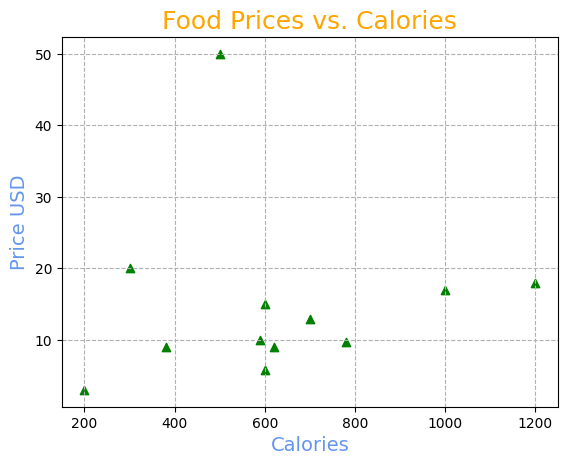

In [249]:
# make the scatterplot
plt.scatter(x,y, color='green', marker='^')
plt.title('Food Prices vs. Calories', fontsize=18, color="orange")
plt.xlabel('Calories', fontsize=14, color="cornflowerblue")
plt.ylabel('Price USD', fontsize=14, color="cornflowerblue")
plt.grid(ls='dashed')
plt.show()

In [250]:
# make another version of the scatterplot, but without the 'Steak' outlier:
# first make a df with no steak row:
food_no_steak_df = food_df[ food_df['Item'] != 'Steak' ]
food_no_steak_df

,Item,Cal,Vegan,Healthy,Qty,Price,Total,Special
11,BLT,780,False,False,19,9.75,185.25,8.78
5,Bison Burger,1000,False,True,18,16.95,305.10,13.56
7,Cesar Salad,600,False,True,13,14.95,194.35,11.96
8,Cheeseburger,1200,False,False,14,17.95,251.30,14.36
6,Chicken Salad,700,False,True,6,12.95,77.70,10.36
4,Fruit Salad,380,True,True,10,8.95,89.50,8.05
2,Hamburger,600,False,False,15,5.75,86.25,5.17
1,Pizza,300,False,False,21,19.99,419.79,15.99
3,Salad,200,True,True,14,2.99,41.86,2.69
10,Tuna Salad Sandwich,620,False,True,9,8.95,80.55,8.05


In [253]:
# redefine x and y since 'Steak' has been removed:
x = list(food_no_steak_df['Cal'])
y = food_no_steak_df['Price'].tolist()

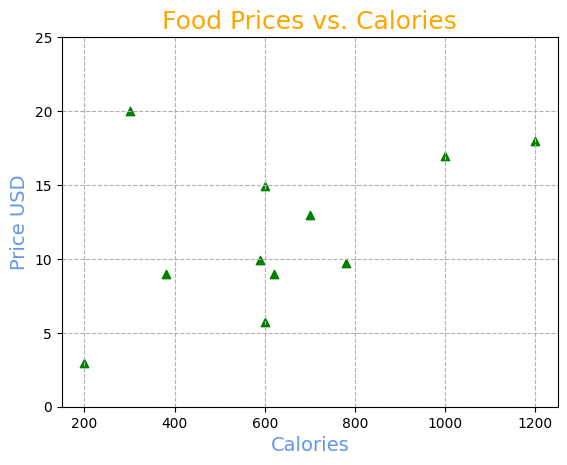

In [257]:
# make the scatterplot
plt.scatter(x,y, color='green', marker='^')
plt.title('Food Prices vs. Calories', fontsize=18, color="orange")
plt.xlabel('Calories', fontsize=14, color="cornflowerblue")
plt.ylabel('Price USD', fontsize=14, color="cornflowerblue")
plt.grid(ls='dashed')
plt.ylim(0,25)
plt.show()

**making a DataFrame from a list of dictionaries**

In [221]:
# let's make a dataframe called fruit_df from this this list of dictionaries
# the list can be passed to the DataFrame() method, same as a dictionary can be
# the keys will automatically be used as the column headers

fruit_list_of_dicts = [
  {"fruit": "apple", "lb": 25, "price": 1.25, "in stock": True },
  {"fruit": "banana", "lb": 15, "price": 0.75, "in stock": True },
  {"fruit": "cherry", "lb": 5, "price": 2.75, "in stock": True },
  {"fruit": "grape", "lb": 10, "price": 2.25, "in stock": False },
  {"fruit": "banana", "lb": 15, "price": 0.75, "in stock": True },
  {"fruit": "kiwi", "lb": 35, "price": 1.75, "in stock": True },
  {"fruit": "mango", "lb": 15, "price": 1.95, "in stock": True },
  {"fruit": "carrot", "lb": 12, "price": 0.95, "in stock": True },
  {"fruit": "orange", "lb": 20, "price": 1.25, "in stock": True },
  {"fruit": "peach", "lb": 25, "price": 1.50, "in stock": False },
]

In [222]:
fruit_df = pd.DataFrame(fruit_list_of_dicts)
fruit_df
# L@@K: There is a duplicate banana row that we should get rid of

,fruit,lb,price,in stock
0,apple,25,1.25,True
1,banana,15,0.75,True
2,cherry,5,2.75,True
3,grape,10,2.25,False
4,banana,15,0.75,True
5,kiwi,35,1.75,True
6,mango,15,1.95,True
7,carrot,12,0.95,True
8,orange,20,1.25,True
9,peach,25,1.50,False


**df.drop_duplicates()**.  

- deletes duplicate rows from a dataframe

In [223]:
# drop (delete) the duplicate banana row:
fruit_df = fruit_df.drop_duplicates()
# L@@K: there is a carrot, which is not a fruit. We should delete it

In [224]:
fruit_df

,fruit,lb,price,in stock
0,apple,25,1.25,True
1,banana,15,0.75,True
2,cherry,5,2.75,True
3,grape,10,2.25,False
5,kiwi,35,1.75,True
6,mango,15,1.95,True
7,carrot,12,0.95,True
8,orange,20,1.25,True
9,peach,25,1.50,False


**df.drop(conditions).index**

- deletes row(s) that meet a condition

In [225]:
# drop the row where the 'fruit' name equals 'carrot'
fruit_df = fruit_df.drop( fruit_df[ fruit_df['fruit'] == 'carrot' ].index )

In [226]:
fruit_df

,fruit,lb,price,in stock
0,apple,25,1.25,True
1,banana,15,0.75,True
2,cherry,5,2.75,True
3,grape,10,2.25,False
5,kiwi,35,1.75,True
6,mango,15,1.95,True
8,orange,20,1.25,True
9,peach,25,1.50,False


In [227]:
# same as previous: get rid of one item but not using drop()
# instead just keep all except the one item
# get rid of mango by not keeping it
fruit_df = fruit_df[ fruit_df['fruit'] != 'mango']

In [228]:
fruit_df

,fruit,lb,price,in stock
0,apple,25,1.25,True
1,banana,15,0.75,True
2,cherry,5,2.75,True
3,grape,10,2.25,False
5,kiwi,35,1.75,True
8,orange,20,1.25,True
9,peach,25,1.50,False


In [90]:
# CHALLENGE ON YOUR OWN:
# make a Pandas DataFrame containing SAT Math and Verbal scores for 12 students
# 'Amy', 'Bob', 'Cal', 'Dan', 'Eda', 'Fay', 'Gao', 'Hal', 'Ida', 'Jan', 'Ken', 'Lee'
# SAT scores should all be in the 400-800 range
# the dataframe should have 4 columns:
# 'Student', 'Math', 'Verbal', 'Combined'
# the 'Combined' column should be Math + Verbal
# sort the results by Combined, from highest to lowest
# HINT: make lists for each column, then a dictionary of key-value pairs
# where each key value is a list
# assign the dictionary to the DataFrame() method
# the keys will automatically be the column headers

# 'Amy', 'Bob', 'Cal', 'Dan', 'Eda', 'Fay', 'Gao', 'Hal', 'Ida', 'Jan', 'Ken', 'Lee'
# math_scores
# verb_score
# combined_

# "Student"
# "Math"
# "Verb"
# "Combined"

# D

In [91]:
# CHALLENGE:
# make a cars_df dataframe with these 6 columns:
# "Make", "Model", "Year", "Color", "Odometer", "For Sale", "Condition"
# make 7 lists to supply the data, using these values
# # then, reset the index so the row numbering goes back to being consecutive
# "Dodge", "Chevrolet", "Ford"
# "Viper", "Corvette", "Mustang"
# 2010, 2016, 2009
# "silver", "orange", "red"
# 23456, 34567, 45678
# True, False, False
# "EX", "VG", "GOOD"


In [92]:
# combine the lists into a dictionary called cars_dict
# {
#     "Make" "Model"
#     "Year" "Color"
#     "Odometer"
#     "For Sale"
#     "Condition"
# }

In [93]:
# make the cars_df dataframe from the dictionary
# D


In [94]:
# add these 3 cars to the cars_df
# first, make a new dataframe called more_cars_df

# "Make": "BMW", "Model": "i8", "Year": 2003, "Color": "red",
# "Odometer": 134234, "For Sale": True, "Condition": "MINT"

# "Make": "Toyota", "Model": "Corolla", "Year": 2020, "Color": "black",
# "Odometer": 12345, "For Sale": False, "Condition": "GOOD"

# "Make": "Honda", "Model": "Civic", "Year": 1993, "Color": "white",
# "Odometer": 189345, "For Sale": False, "Condition": "GOOD"


# mo

In [95]:
# then, use the concat() method to add more_cars to cars
# cat

In [96]:
# then, reset the index so the row numbering goes back to being consecutive
# res

In [98]:
 # CHALLENGE: Make a dataframe called movies_df
# movies_df should have the following columns:
# "Movie", "Genre", "Rating", "Star"
# "Sophie's Choice", "Coming to America", "Training Day", "Speed",  "Notebook", "Dracula"
# "Historical Drama", "Comedy", "Cop Drama", "Action", "Romance", "Horror"
# 4.5, 4.7, 4.2, 4.4, 4.8, 4.6
# "Meryl Streep", "Eddie Murphy", "Denzel Washington", "Sandra Bullock", "Ryan Gosling", "Christopher Lee"

# mo

In [99]:
# CHALLENGE: get the mean (average) rating of the movies
# round the value off to 3 decimal places:
# avg